In [1]:
import torch
from attention.agent import AttentionAgent
from walkenv2 import WalkEnvModelFree
from helper import plot, hist

pygame 2.6.0 (SDL 2.28.4, Python 3.8.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
plot_score = []
plot_q = []
plot_duration = []
plot_loss = []
total_score = 0
record = 0
episodes_length = {}

agent = AttentionAgent()
game = WalkEnvModelFree()

In [7]:
def on_game_done(reward, score):
    # train long memory, plot result
    n_moves = agent.n_moves
    episodes_length[game.steps] = episodes_length.get(game.steps, 0) + 1
    game.reset()
    agent.n_games += 1
    global record
    if score > record:
        record = score
        # agent.target_net.save()

    print('Game', agent.n_games, 'Reward', reward, 'Score', score, 'Record:', record)
    agent.train_long_memory()


    plot_score.append(score)
    plot_duration.append(n_moves)
    plot_q.append(agent.trainer.get_avg_q())
    agent.trainer.q_vals = []
    
    plot_loss.append(agent.trainer.retrieve_avg_loss())
    agent.trainer.loss_vals = []
    
    if agent.n_games % 1000 == 0:
        hist(episodes_length)
    
    starting_state = game.get_current_state()
    return starting_state

In [4]:
def step(state):

    state_to_save = agent.make_time_seq(state, save=True)
    agent.n_moves += 1
    
    # get move
    action = agent.get_action(state_to_save, game)
    
    # perform move and get new state
    reward, done, score = game.play_step(action)
    # print(f'step reward {reward}')
    
    if done:
        new_state = None
        new_state_to_save = None
    else:
        new_state = game.get_current_state()
        new_state_to_save = agent.make_time_seq(new_state)


    agent.remember(state_to_save, action, new_state_to_save, torch.tensor([reward]))
    # agent.remember(state, action, new_state, torch.tensor([reward]))
    
    if done:
        return new_state, True, reward, score
    return new_state, False, reward, 0

Game 201 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 202 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 203 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 204 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 205 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 206 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 207 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 208 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 209 Reward 1.0 Score 7 Record: 41
Total reward: tensor([1.])
Game 210 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 211 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 212 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 213 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 214 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 215 Reward -1 Score 0 Record: 41
Total reward: tensor([-1.])
Game 216 R

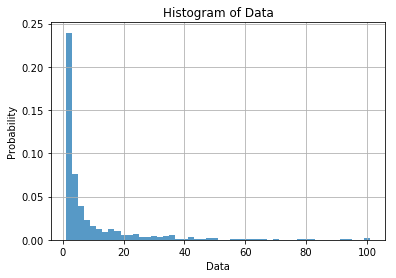

Game 1001 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1002 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1003 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1004 Reward 1.0 Score 10 Record: 122
Total reward: tensor([1.])
Game 1005 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1006 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1007 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1008 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1009 Reward 1.0 Score 35 Record: 122
Total reward: tensor([1.])
Game 1010 Reward 1.0 Score 68 Record: 122
Total reward: tensor([1.])
Game 1011 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1012 Reward 1.0 Score 7 Record: 122
Total reward: tensor([1.])
Game 1013 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1014 Reward -1 Score 0 Record: 122
Total reward: tensor([-1.])
Game 1015 Reward -1 Score 0 Record: 122
Total

In [8]:
state = game.get_current_state()
    
while agent.n_games < 1300:
    state, game_done, reward, play_score = step(state)
    if game_done:
        state = on_game_done(reward, play_score)


In [8]:
agent.target_net.layer1.weight

Parameter containing:
tensor([[-0.0869,  0.1442, -0.0414,  ..., -0.0369,  0.1011,  0.1228],
        [ 0.0362,  0.1576, -0.0014,  ..., -0.1149,  0.1639,  0.1077],
        [ 0.0842,  0.0346,  0.0971,  ...,  0.1543, -0.0837, -0.0736],
        ...,
        [-0.0161, -0.0260,  0.0691,  ...,  0.0128, -0.1064, -0.0698],
        [ 0.0369, -0.1464, -0.0056,  ...,  0.0450, -0.0285, -0.1662],
        [-0.1001, -0.0086,  0.1419,  ...,  0.0904,  0.0579, -0.0921]],
       requires_grad=True)

In [12]:
state = game.get_current_state()
with torch.no_grad():
    state_u = state.flatten().unsqueeze(0)
    q = agent.policy_net(state_u)
q

tensor([[ 0.0828, -0.0263, -0.0366]])

In [13]:
game.get_current_state()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8000, 0.8000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

True

Point(x=0, y=40)

In [13]:
game.get_current_state()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.8000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])